In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Species'] = iris.target_names[iris.target]
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
df.shape

(150, 6)

In [5]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])


In [8]:
# Feature Scaling
X = df.drop('Species', axis=1)
y = df['Species']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [10]:
# Training the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)


KNeighborsClassifier()

In [11]:
#Evaluating the model
# Predict on the test set
y_pred = knn.predict(X_test)

# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy * 100:.2f}%")


Accuracy:100.00%


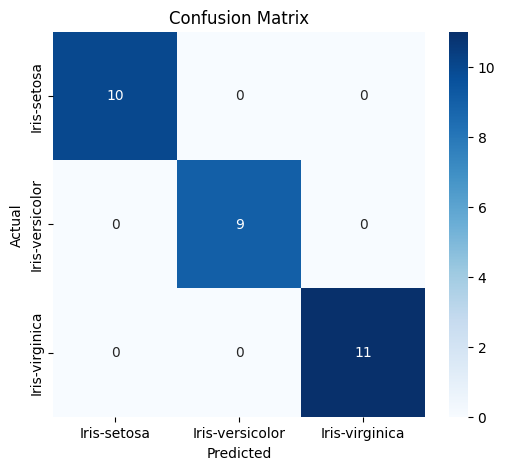

In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [13]:
# Classification Report
print(classification_report(y_test, y_pred, target_names=encoder.classes_))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [14]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning with Grid Search
param_grid = {'n_neighbors': np.arange(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameter
print("Best k:", grid_search.best_params_['n_neighbors'])


Best k: 3


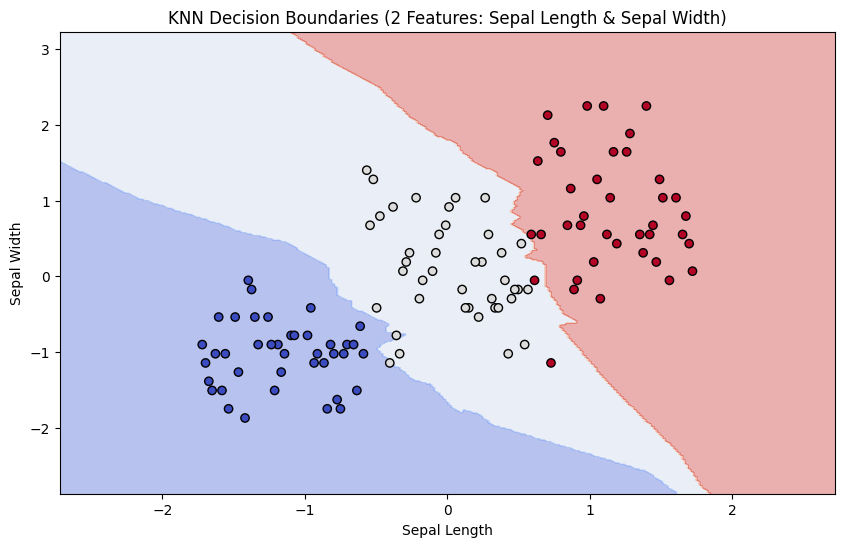

In [15]:
# Select the first two features (sepal length and sepal width)
X_2d = X_scaled[:, :2]

# Split the data into training and test sets (for 2D data)
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_train_2d, y_train_2d)

# Create a mesh grid for plotting decision boundaries
h = 0.02  # step size in mesh
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class labels for each point in the mesh
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train_2d, edgecolors='k', cmap='coolwarm')
plt.title('KNN Decision Boundaries (2 Features: Sepal Length & Sepal Width)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


In [18]:
# Print correct and incorrect predictions
correct = []
incorrect = []
for i in range(len(y_test)):
    # Access y_test using .iloc[] for position-based indexing
    if y_pred[i] == y_test.iloc[i]:
        correct.append((X_test[i], y_test.iloc[i], y_pred[i]))
    else:
        incorrect.append((X_test[i], y_test.iloc[i], y_pred[i]))

In [22]:
print("Correct Predictions:")
for sample, actual, predicted in correct:
    # Get the original species names from the encoder
    actual_species = encoder.inverse_transform([actual])[0]
    predicted_species = encoder.inverse_transform([predicted])[0]
    print(f"Actual: {actual_species}, Predicted: {predicted_species}")

Correct Predictions:
Actual: Iris-versicolor, Predicted: Iris-versicolor
Actual: Iris-setosa, Predicted: Iris-setosa
Actual: Iris-virginica, Predicted: Iris-virginica
Actual: Iris-versicolor, Predicted: Iris-versicolor
Actual: Iris-versicolor, Predicted: Iris-versicolor
Actual: Iris-setosa, Predicted: Iris-setosa
Actual: Iris-versicolor, Predicted: Iris-versicolor
Actual: Iris-virginica, Predicted: Iris-virginica
Actual: Iris-versicolor, Predicted: Iris-versicolor
Actual: Iris-versicolor, Predicted: Iris-versicolor
Actual: Iris-virginica, Predicted: Iris-virginica
Actual: Iris-setosa, Predicted: Iris-setosa
Actual: Iris-setosa, Predicted: Iris-setosa
Actual: Iris-setosa, Predicted: Iris-setosa
Actual: Iris-setosa, Predicted: Iris-setosa
Actual: Iris-versicolor, Predicted: Iris-versicolor
Actual: Iris-virginica, Predicted: Iris-virginica
Actual: Iris-versicolor, Predicted: Iris-versicolor
Actual: Iris-versicolor, Predicted: Iris-versicolor
Actual: Iris-virginica, Predicted: Iris-virgini

In [25]:
print("\nIncorrect Predictions:")
for sample, actual, predicted in incorrect:
    # Get the original species names from the encoder
    actual_species = encoder.inverse_transform([actual])[0]
    predicted_species = encoder.inverse_transform([predicted])[0]
    print(f"Actual: {actual_species}, Predicted: {predicted_species}")


Incorrect Predictions:
